Программа для вычисления дополнения нечеткого множества
с трапециевидной функцией принадлежности


Введите название нечеткого множества:  Температура



Введите параметры трапециевидной функции принадлежности (a, b, c, d):
где: a ≤ b ≤ c ≤ d


a (левая нижняя точка):  -20
b (левая верхняя точка):  0
c (правая верхняя точка):  10
d (правая нижняя точка):  20



Введите элементы множества (через пробел):


 -5 0 5 11 12 25



РЕЗУЛЬТАТЫ:

Исходное нечеткое множество 'Температура':
Элемент | Степень принадлежности
-----------------------------------
  -5.00 |              0.7500
   0.00 |              1.0000
   5.00 |              1.0000
  11.00 |              0.9000
  12.00 |              0.8000
  25.00 |              0.0000

Дополнение нечеткого множества 'Температура':
Элемент | Степень принадлежности
-----------------------------------
  -5.00 |              0.2500
   0.00 |              0.0000
   5.00 |              0.0000
  11.00 |              0.1000
  12.00 |              0.2000
  25.00 |              1.0000

Визуализация функций принадлежности...


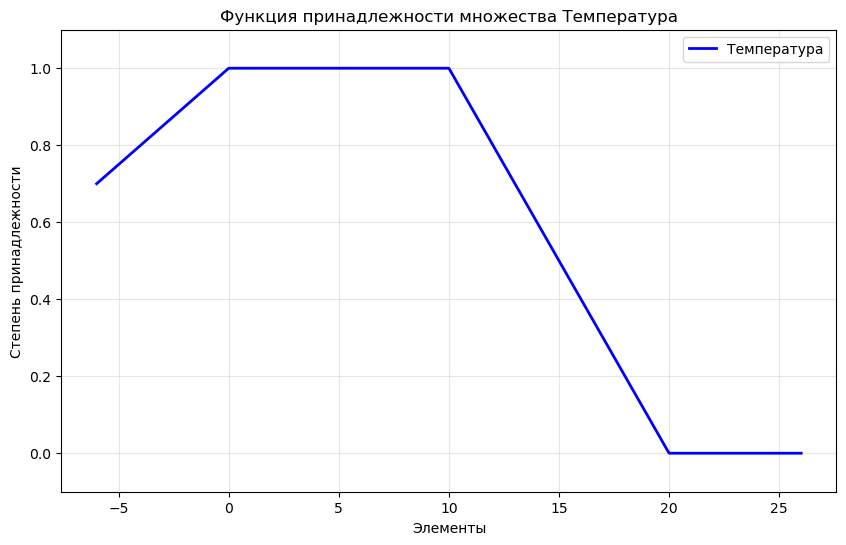

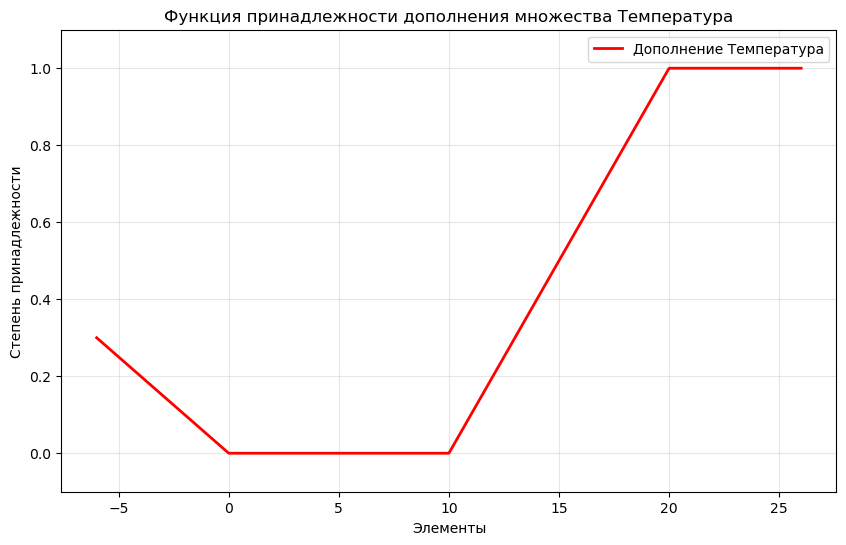


ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:
Параметры трапециевидной функции: a=-20.0, b=0.0, c=10.0, d=20.0
Количество элементов: 6

Проверка свойств дополнения:
Для элемента -5.00:
  Исходная принадлежность: 0.7500
  Дополнение: 0.2500
  Двойное дополнение: 0.7500 (должно быть равно исходной)


In [9]:
import numpy as np
import matplotlib.pyplot as plt

class FuzzySet:
    def __init__(self, name, a, b, c, d, elements):
        """
        Инициализация нечеткого множества с трапециевидной функцией принадлежности
        
        Параметры:
        name - название множества
        a, b, c, d - параметры трапециевидной функции принадлежности
        elements - список элементов множества
        """
        self.name = name
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.elements = elements
        
    def trapezoidal_membership(self, x):
        """
        Вычисление степени принадлежности для элемента x
        с использованием трапециевидной функции
        """
        if x <= self.a or x >= self.d:
            return 0.0
        elif self.a < x <= self.b:
            if self.a == self.b:
                return 1.0
            return (x - self.a) / (self.b - self.a)
        elif self.b < x <= self.c:
            return 1.0
        elif self.c < x < self.d:
            if self.c == self.d:
                return 1.0
            return (self.d - x) / (self.d - self.c)
        else:
            return 0.0
    
    def calculate_memberships(self):
        """Вычисление степеней принадлежности для всех элементов"""
        memberships = {}
        for element in self.elements:
            memberships[element] = self.trapezoidal_membership(element)
        return memberships
    
    def complement(self):
        """Вычисление дополнения нечеткого множества"""
        memberships = self.calculate_memberships()
        complement_memberships = {}
        
        for element, membership in memberships.items():
            complement_memberships[element] = 1.0 - membership
            
        return complement_memberships
    
    def plot_membership_function(self, complement=False):
        """Визуализация функции принадлежности"""
        x = np.linspace(min(self.elements) - 1, max(self.elements) + 1, 1000)
        y = []
        
        for value in x:
            if complement:
                y.append(1 - self.trapezoidal_membership(value))
            else:
                y.append(self.trapezoidal_membership(value))
        
        plt.figure(figsize=(10, 6))
        
        if complement:
            plt.plot(x, y, 'r-', linewidth=2, label=f'Дополнение {self.name}')
            plt.title(f'Функция принадлежности дополнения множества {self.name}')
        else:
            plt.plot(x, y, 'b-', linewidth=2, label=self.name)
            plt.title(f'Функция принадлежности множества {self.name}')
        
        plt.xlabel('Элементы')
        plt.ylabel('Степень принадлежности')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.ylim(-0.1, 1.1)
        plt.show()

def main():
    print("=" * 60)
    print("Программа для вычисления дополнения нечеткого множества")
    print("с трапециевидной функцией принадлежности")
    print("=" * 60)
    
    try:
        # Ввод параметров от пользователя
        name = input("Введите название нечеткого множества: ")
        
        print("\nВведите параметры трапециевидной функции принадлежности (a, b, c, d):")
        print("где: a ≤ b ≤ c ≤ d")
        
        a = float(input("a (левая нижняя точка): "))
        b = float(input("b (левая верхняя точка): "))
        c = float(input("c (правая верхняя точка): "))
        d = float(input("d (правая нижняя точка): "))
        
        # Проверка корректности параметров
        if not (a <= b <= c <= d):
            print("Ошибка: параметры должны удовлетворять условию a ≤ b ≤ c ≤ d")
            return
        
        # Ввод элементов множества
        print("\nВведите элементы множества (через пробел):")
        elements_input = input().split()
        elements = [float(x) for x in elements_input]
        
        # Создание нечеткого множества
        fuzzy_set = FuzzySet(name, a, b, c, d, elements)
        
        # Вычисление степеней принадлежности
        original_memberships = fuzzy_set.calculate_memberships()
        complement_memberships = fuzzy_set.complement()
        
        # Вывод результатов
        print("\n" + "=" * 60)
        print("РЕЗУЛЬТАТЫ:")
        print("=" * 60)
        
        print(f"\nИсходное нечеткое множество '{fuzzy_set.name}':")
        print("Элемент | Степень принадлежности")
        print("-" * 35)
        for element, membership in original_memberships.items():
            print(f"{element:7.2f} | {membership:19.4f}")
        
        print(f"\nДополнение нечеткого множества '{fuzzy_set.name}':")
        print("Элемент | Степень принадлежности")
        print("-" * 35)
        for element, membership in complement_memberships.items():
            print(f"{element:7.2f} | {membership:19.4f}")
        
        # Визуализация
        print("\nВизуализация функций принадлежности...")
        fuzzy_set.plot_membership_function(complement=False)
        fuzzy_set.plot_membership_function(complement=True)
        
        # Дополнительная информация
        print("\n" + "=" * 60)
        print("ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:")
        print("=" * 60)
        print(f"Параметры трапециевидной функции: a={a}, b={b}, c={c}, d={d}")
        print(f"Количество элементов: {len(elements)}")
        
        # Проверка свойств дополнения
        print("\nПроверка свойств дополнения:")
        test_element = elements[0] if elements else (a + b) / 2
        original = fuzzy_set.trapezoidal_membership(test_element)
        complement = 1 - original
        double_complement = 1 - complement
        
        print(f"Для элемента {test_element:.2f}:")
        print(f"  Исходная принадлежность: {original:.4f}")
        print(f"  Дополнение: {complement:.4f}")
        print(f"  Двойное дополнение: {double_complement:.4f} (должно быть равно исходной)")
        
    except ValueError as e:
        print(f"Ошибка ввода данных: {e}")
    except Exception as e:
        print(f"Произошла ошибка: {e}")

if __name__ == "__main__":
    main()